# Statistics class 4th 

in inferential statistics we do null hypothesis and alternative hypothesis 

where h0 ---->> null hypothesis 

where h1 or ha ----->> alternative hypothesis 

# Chi square test for hypothesis test

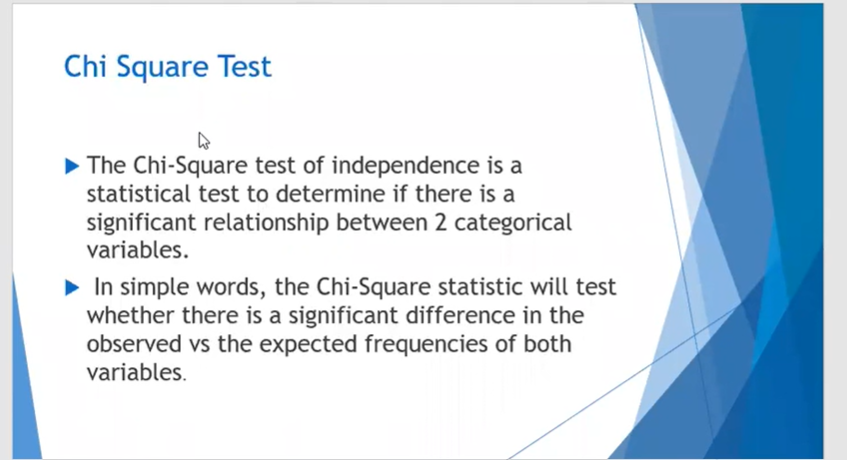

so bascally suppose here we have two variable (v1 and v2) if both v1 and v2 have numerical value then we will do correlation test 

supoose if variables (v1 and v2 ) have object data(string data) , categorical data , here we will check if the variables are dependent on each other or not . in this case we will go with the chi square test 

if research shows the null hypothesis (h0 is true) is true it means the both variable are independent of each other  (in chi square test)

if research shows that the alternate hypothesis (ha is true ) it means both the variable are dependent on each other

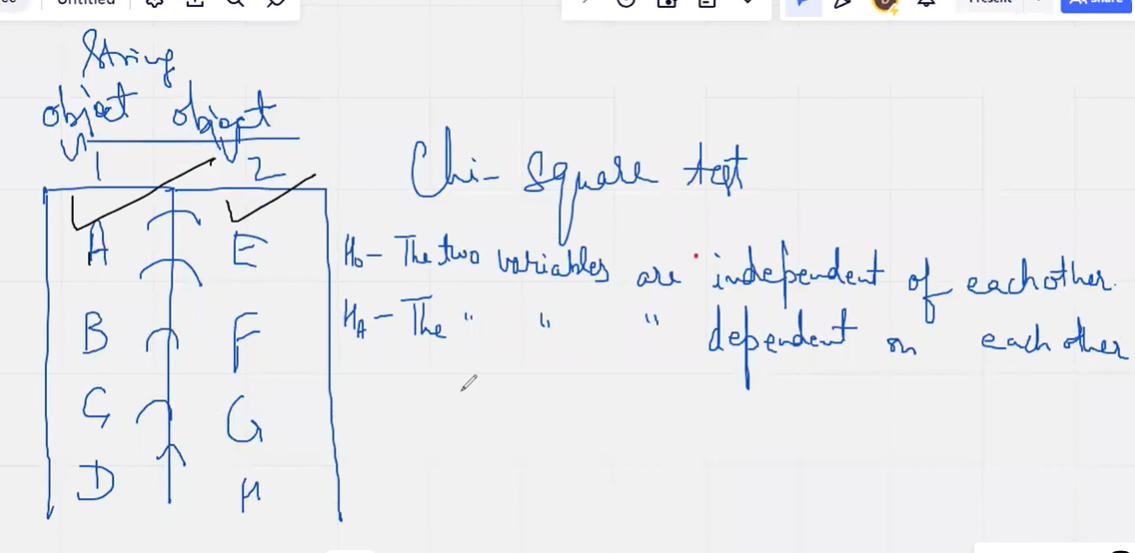

in chi square test if p>0.05 , null hypothesis is accepted and alternative hypothesis is rejected 

if p-value < 0.05 , then alternate hypothesis is accepted and null hypothesis is rejected 

in regression test we have the numerical value of both the variables and it shows the variance or correlation just like if we change any variale value then it will effect other variable of v2 too 

Regression test example --->> let's take two variable height and weight 

so we can say that height effects the weight of person , if height increase the weight will increase too 

so we can say height and weight have the postive good realtion to each other 

Let's see an example in chi sqaure test 

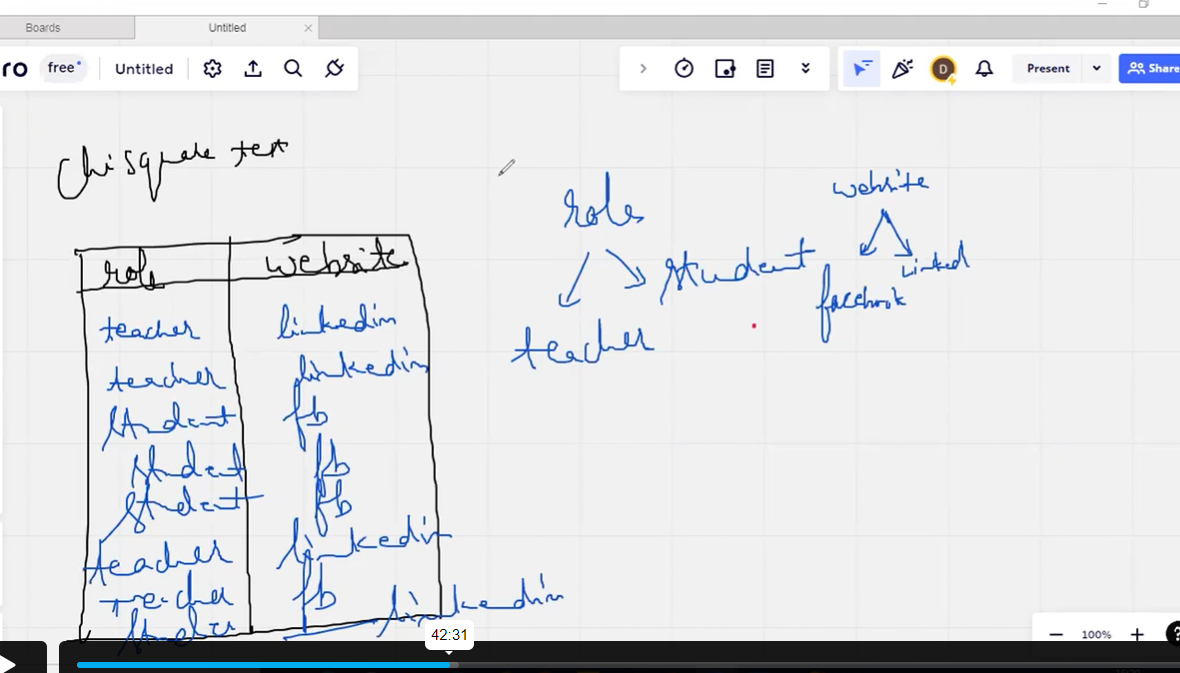

let's say we have two role and two websites ->> fb and linkedin and two roles are teacher and student to find out the relation between roles and websites we have to do the chi-square test 

h0 will show us two variable are independent of each other

h1 will shows ud two variable are depend on each other 

now we will perform chi square test with some particular formulas 

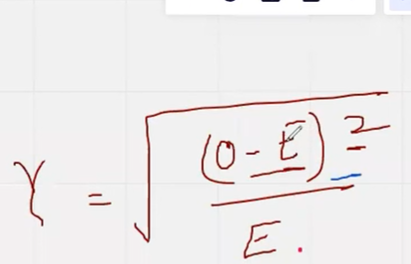

o-->> observed , E-->> expected 

suppose there is a grocery shop the person who own the grocery shop , thought that on sunday 100 person are coming to purchase milk and butter so this is expectations 

but actual 150 people arrived on sunday that is the observation 

we will use scipy stats to perform this formula 


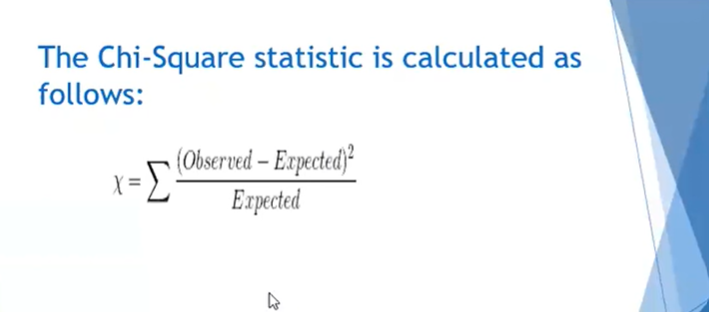

In [2]:
import pandas as pd 
import numpy as np 
import scipy 
from scipy import stats 
from scipy.stats import percentileofscore 

# Categorical variabal test of indendence ------ CHi square test

In [4]:
df = pd.read_csv("role_website.csv")
df

,role,website
0,teacher,linkedin
1,teacher,linkedin
2,student,facebook
3,student,facebook
4,teacher,linkedin
5,student,facebook
6,student,facebook
7,teacher,linkedin
8,teacher,linkedin
9,teacher,facebook


In [5]:
ds = pd.DataFrame(df)
df

,role,website
0,teacher,linkedin
1,teacher,linkedin
2,student,facebook
3,student,facebook
4,teacher,linkedin
5,student,facebook
6,student,facebook
7,teacher,linkedin
8,teacher,linkedin
9,teacher,facebook


In [6]:
ds.describe()

,role,website
count,34,34
unique,2,2
top,teacher,linkedin
freq,21,18


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   role     34 non-null     object
 1   website  34 non-null     object
dtypes: object(2)
memory usage: 672.0+ bytes


In [13]:
ds.dtypes

role       object
website    object
dtype: object

In [15]:
# create contingency table 
df_crosstab = pd.crosstab(df['role'] , df['website'] , margins= True)

In [22]:
df_crosstab # margin = True gives us rhe all and all 

,facebook,linkedin,row total
student,10,3,13
teacher,6,15,21
column total,16,18,34


In [23]:
df_crosstab.columns=['facebook' , 'linkedin' , 'row total']
df_crosstab.index= ['student' , 'teacher' , 'column total']
df_crosstab

,facebook,linkedin,row total
student,10,3,13
teacher,6,15,21
column total,16,18,34


In [27]:
# get the observed table 
observed = df_crosstab.iloc[0:2,0:2] #in rows 0,1 is selected and in column 0,1 is selected 

In [28]:
observed

,facebook,linkedin
student,10,3
teacher,6,15


In [36]:
#expected table 
#e= (row total * column total) / grand total
# E1 = 13*16/34 = 6.11
# E1
# E2 = 13*18/34 = 6.88
#E3 = 21*16/34 = 9.88
# E4 = 21*18/34 = 11.117


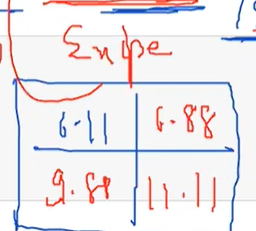

In [37]:
expected = np.outer(df_crosstab["row total"][0:2] , df_crosstab.loc['column total'][0:2])/34

In [38]:
expected 

array([[ 6.11764706,  6.88235294],
       [ 9.88235294, 11.11764706]])

Interal calculation of the expected value will be done by python itself let's see 

In [40]:
#st.chi2_contingency is done to do the chi-square test  . it is one of the function which is going to calculate entire test 

In [41]:
import scipy.stats as st 

we have to pass the observed data when we pass the scipy.stats.chi2_contingency

In [43]:
'''calculate the chi-square test by stats method'''
chi2 , p , dof , expected=stats.chi2_contingency(observed = observed) # it eill give us 4 values

# you can check the return data by calling it 
# the return data includes chisq test , p , dof and expected value 
#print("stresult" = stresult)

print('chi square test' , chi2)
print("p-value-" , p)
print('dof=' , dof)
print('expected=' , expected)

'''from this we interpret the p value is .016 which is less than the .05 value so the null 
hypothesis is rejected and that's means that variable are dependent '''


chi square test 5.718991656491658
p-value- 0.01678236577734386
dof= 1
expected= [[ 6.11764706  6.88235294]
 [ 9.88235294 11.11764706]]


"from this we interpret the p value is .016 which is less than the .05 value so the null \nhypothesis is rejected and that's means that variable are dependent "

In [45]:
# dof here means degree of freedom  # p-value will never be equal to .05

the two vairbales role and website are dependemt on each other 

In [48]:
# signifinance value 
alpha = 0.05
# determine whether to accept or reject the null hypothesis 
print("significance level alpha = %.2f , p=%.2f " % (alpha , p))
if p >= alpha :
    print("varibles are not associated and independent(accept h0/null hpothesis )")
else:
    print("varibale are dependent and associated (accept ha /aternate hypothesis )")
    

significance level alpha = 0.05 , p=0.02 
varibale are dependent and associated (accept ha /aternate hypothesis )


# Anova Test 

Anova test is done where there are two groups 

suppose there is class and maths test is taken in that class and there are three section A , B , C and while conducting the test teacher wants to understand that what is the analysis of the variances between the section and among the section 

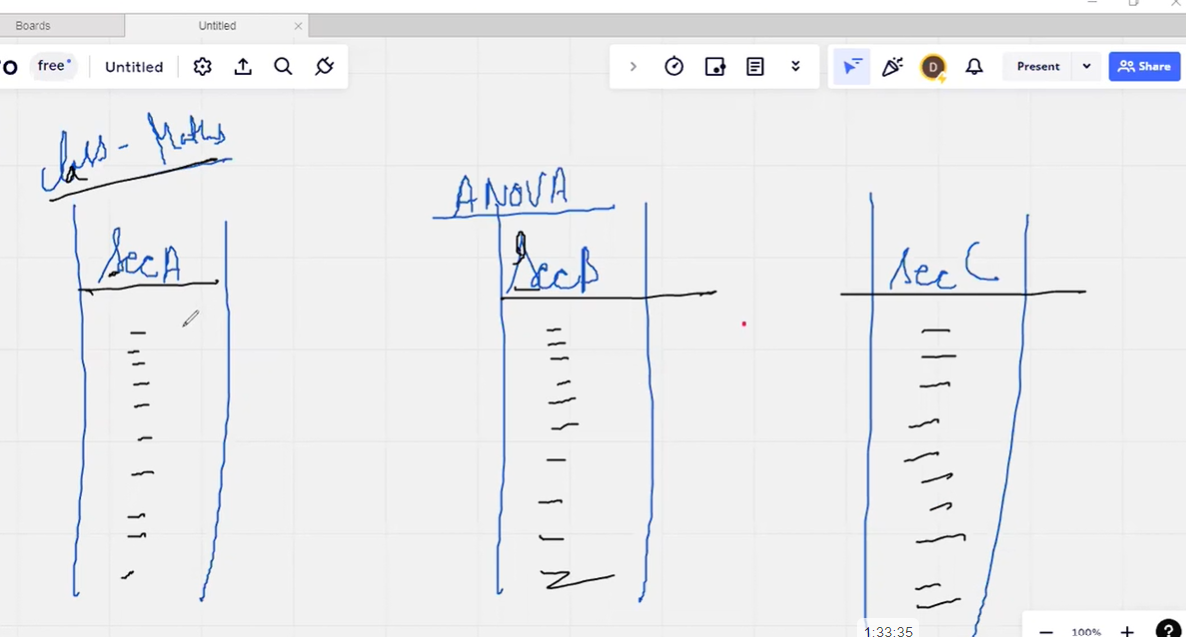

there is f1oneway (fisher give this formula ) through this formula entire anova test is done 

inside scipy.stats we  have f1oneway 

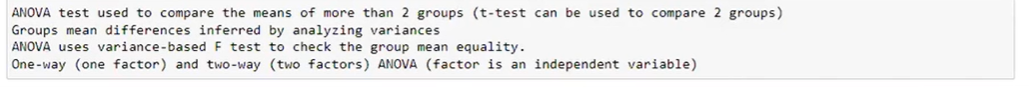

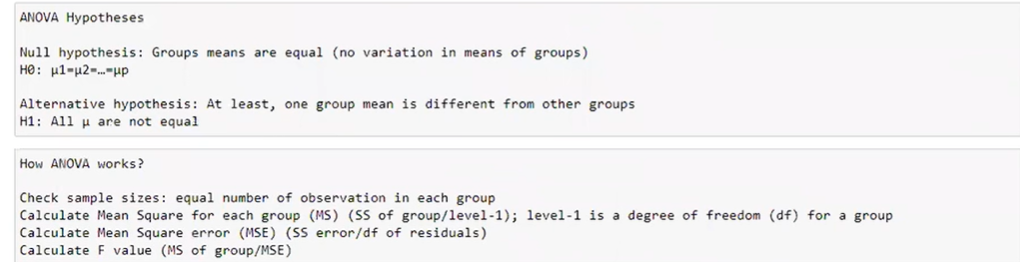

for more than 2 groups anova test is used to find the relation between means but for finding between two variance t test is used

In [51]:
# let's find  the analysis of variance (aova) among marks conducted for maths test is three section 
# the below is three marks list of three section 

from scipy.stats import f_oneway

marks_sectionA = [70,40,60,78,92]
marks_sectionB = [65,55,70,80,72]
marks_sectionc = [70,30,86,59,96]

f_oneway(marks_sectionA , marks_sectionB , marks_sectionc)

F_onewayResult(statistic=0.0005326231691078563, pvalue=0.9994675422760659)

In [52]:
# interpereting the result----->> as p value > 0.05 , null hypothesis accepted and all groups means are equal  

In [55]:
import numpy as np
print(np.mean(marks_sectionA))  # all the means are very close to each other 
print(np.mean(marks_sectionB))
print(np.mean(marks_sectionc))

68.0
68.4
68.2


# EDA (Exploratory Data Analysis) 

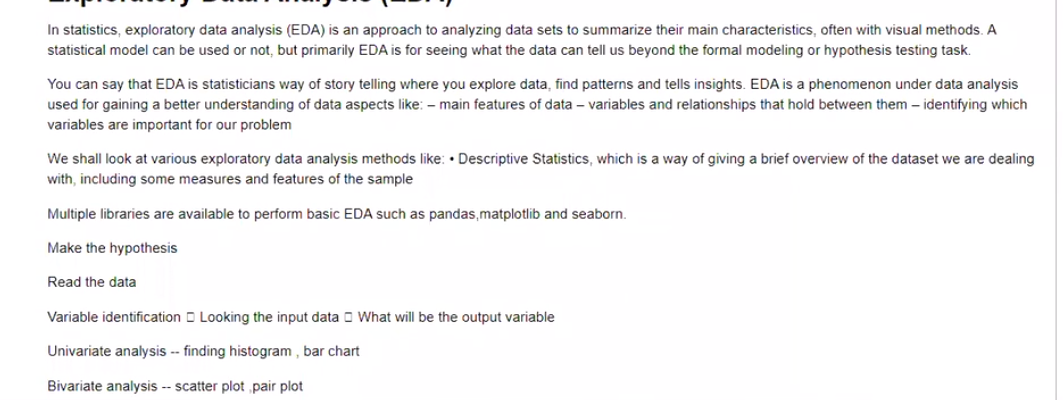

In [57]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns  
import matplotlib

how do we know that in any data there are outliers .....

box plot , zscore and quantile used to find the outliers 

In [58]:
df = pd.read_csv("president_heights.csv")
df
# finding out outliers in this file 

,order,name,height
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183
5,6,John Quincy Adams,171
6,7,Andrew Jackson,185
7,8,Martin Van Buren,168
8,9,William Henry Harrison,173
9,10,John Tyler,183


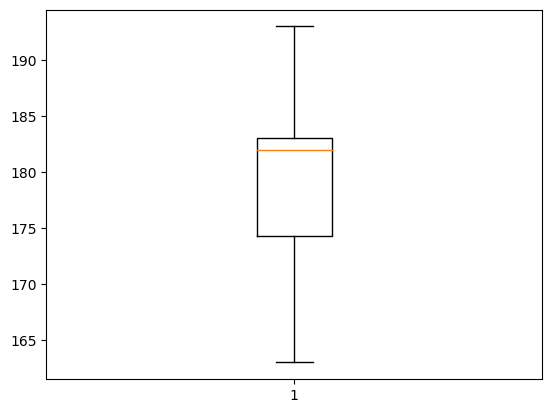

In [63]:
# we will take height numerical data 
# we will use boxplot that will help us to find out outliers 
plt.boxplot('height' , data = df)
plt.show()

In [64]:
# we can see in the above boxplot there are no outliers ......

we can also use pandas method to find out the outliers (quantilr method)

In [68]:
df['height'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
# here 0.0 represents 0 percentile , 0.1 represents 10th percentile , 0.2 represents 20th percentile 


0.0    163.0
0.1    170.1
0.2    173.0
0.3    175.6
0.4    178.0
0.5    182.0
0.6    183.0
0.7    183.0
0.8    185.0
0.9    188.0
1.0    193.0
Name: height, dtype: float64

In [70]:
#above the value of 0 percentile is 163 in the same way value of 10th percentile  is 170 and value of 20th is 173 and so on .....

In [71]:
#load csv file ...
df1 = pd.read_csv("HR_attrition_rate.csv")
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [73]:
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

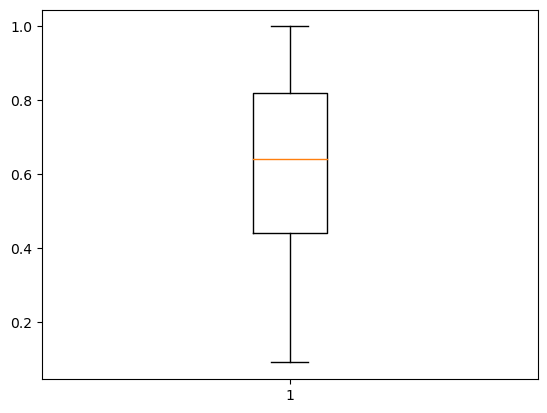

In [76]:
plt.boxplot(df1.satisfaction_level)
plt.show()  # this bocplot again shows as no outliers 

In [77]:
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

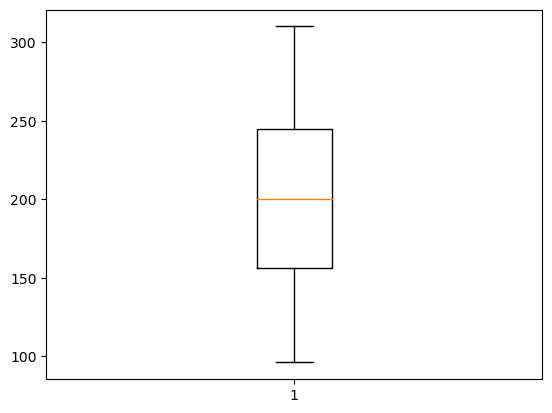

In [81]:
plt.boxplot(df1.average_montly_hours)
plt.show() # again no outliers 

In [82]:
df1["satisfaction_level"].quantile([0 , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7, 0.8 , 0.9 , 1])

0.0    0.09
0.1    0.21
0.2    0.40
0.3    0.49
0.4    0.57
0.5    0.64
0.6    0.72
0.7    0.78
0.8    0.85
0.9    0.92
1.0    1.00
Name: satisfaction_level, dtype: float64

In [84]:
# so we  can say there is not that much difference between the values so there are no outliers .... 

In [88]:
df3 = pd.read_csv("brain_size.csv" , sep = ';')
df3

,id,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118,64.5,816932
1,2,Male,140,150,124,.,72.5,1001121
2,3,Male,139,123,150,143,73.3,1038437
3,4,Male,133,129,128,172,68.8,965353
4,5,Female,137,132,134,147,65.0,951545
5,6,Female,99,90,110,146,69.0,928799
6,7,Female,138,136,131,138,64.5,991305
7,8,Female,92,90,98,175,66.0,854258
8,9,Male,89,93,84,134,66.3,904858
9,10,Male,133,114,147,172,68.8,955466


In [89]:
df3.columns

Index(['id', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height', 'MRI_Count'], dtype='object')

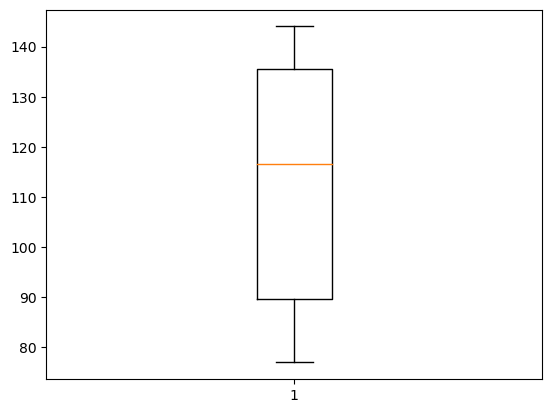

In [90]:
plt.boxplot('FSIQ' , data = df3)
plt.show()  # again no outliers 

In [91]:
df3.columns

Index(['id', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height', 'MRI_Count'], dtype='object')

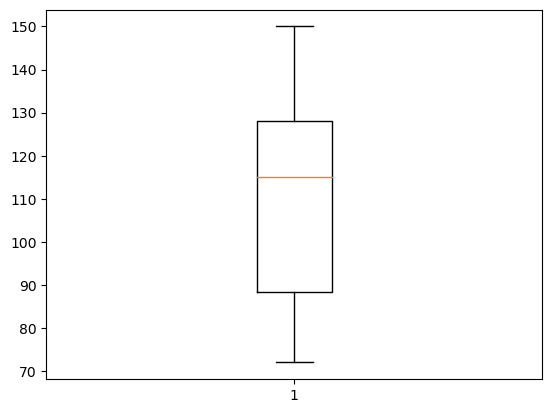

In [94]:
plt.boxplot(df3.PIQ)
plt.show()

In [96]:
tf3=pd.read_csv('titanic_train.csv')
tf3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


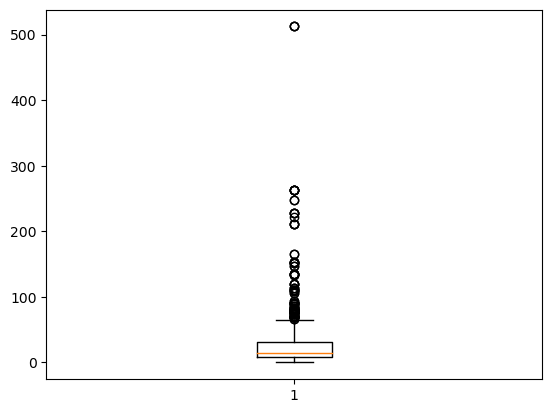

In [99]:
plt.boxplot(tf3.Fare)
plt.show() # outliers can be seen now ...

In [102]:
df4=pd.read_csv('house_price_data.csv')
df4

,Id,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


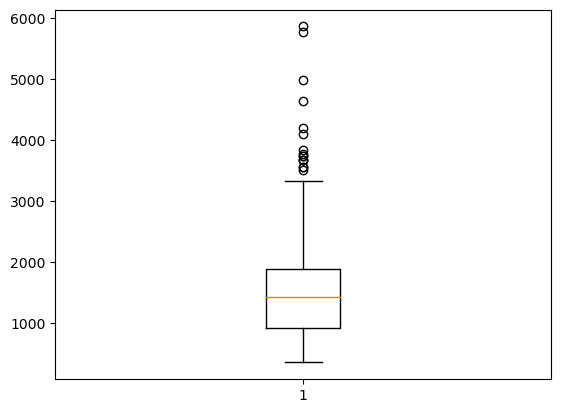

In [104]:
plt.boxplot('Sqft' , data =df4)
plt.show()

In [106]:
mf = pd.read_csv("house_price_data_median.csv")
mf

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [107]:
mf.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'AboveMedianPrice'],
      dtype='object')

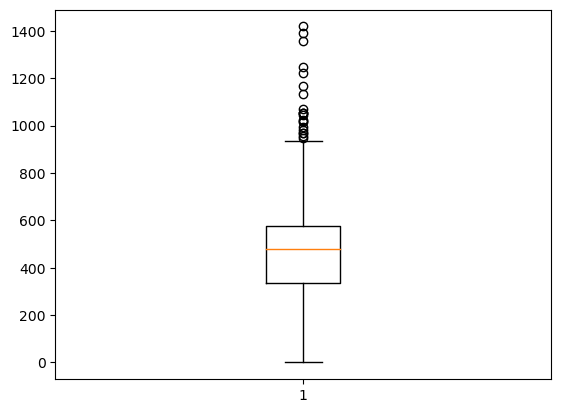

In [110]:
plt.boxplot("GarageArea" , data = mf )
plt.show()

In [112]:
mf.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'AboveMedianPrice'],
      dtype='object')

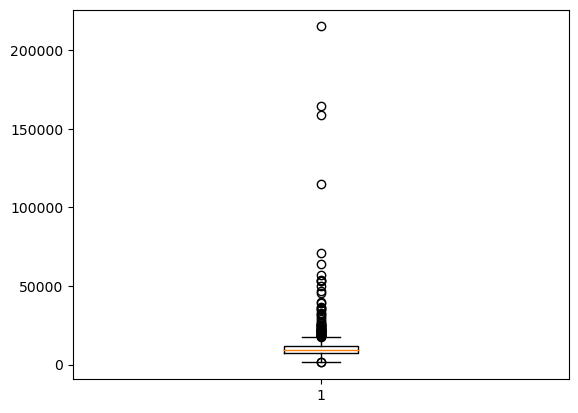

In [115]:
plt.boxplot(mf.LotArea)
plt.show()

In [116]:
mf["LotArea"].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0      1300.0
0.1      5000.0
0.2      7078.4
0.3      8063.7
0.4      8793.4
0.5      9478.5
0.6     10198.2
0.7     11066.5
0.8     12205.8
0.9     14381.7
1.0    215245.0
Name: LotArea, dtype: float64

In [117]:
# as we can see there is a lot of differnce between percentiles  we can also see some high jumpes 

In [118]:
mf.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'AboveMedianPrice'],
      dtype='object')

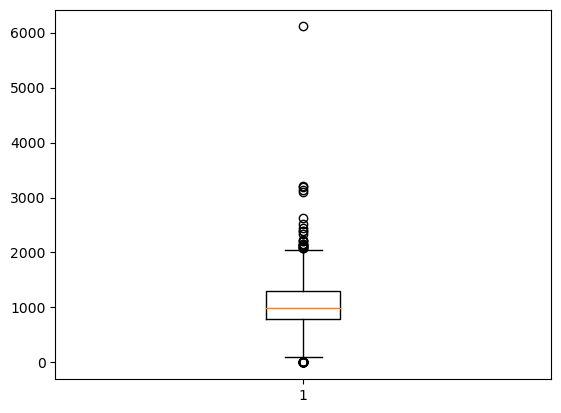

In [119]:
plt.boxplot(mf.TotalBsmtSF)
plt.show()

In [120]:
mf['TotalBsmtSF']

0        856
1       1262
2        920
3        756
4       1145
        ... 
1455     953
1456    1542
1457    1152
1458    1078
1459    1256
Name: TotalBsmtSF, Length: 1460, dtype: int64

In [125]:

import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='TotalBsmtSF'>

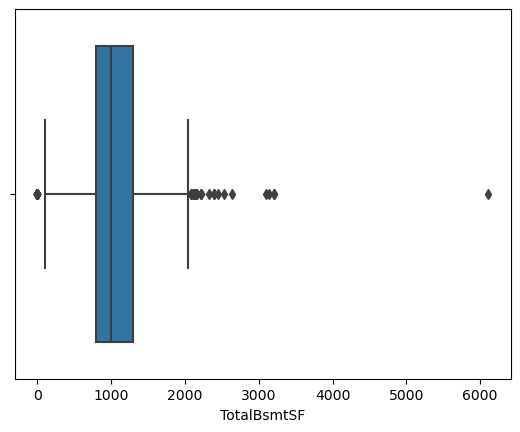

In [127]:
sns.boxplot(mf.TotalBsmtSF)

<AxesSubplot:xlabel='GarageArea'>

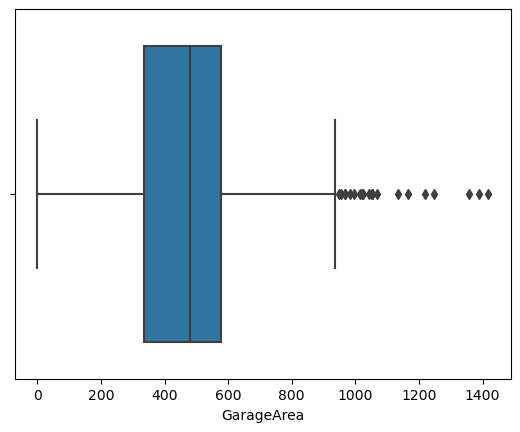

In [128]:
sns.boxplot(mf.GarageArea)

In [130]:
mf['GarageArea'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0       0.0
0.1     240.0
0.2     295.6
0.3     384.0
0.4     440.0
0.5     480.0
0.6     516.0
0.7     560.0
0.8     620.2
0.9     757.1
1.0    1418.0
Name: GarageArea, dtype: float64

In [131]:
# here we can see a jump in the range 

Text(0, 0.5, 'Garage Area')

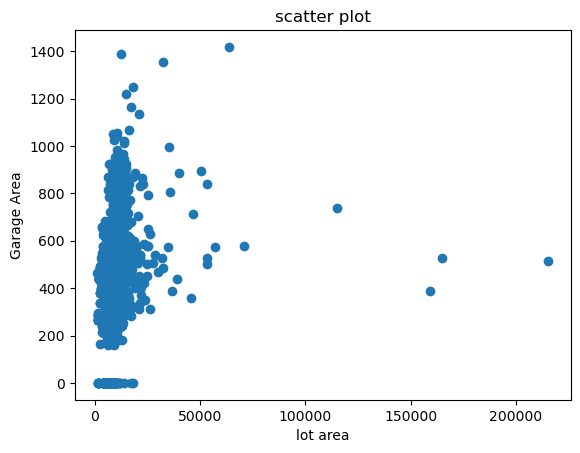

In [132]:
plt.scatter(mf.LotArea , mf.GarageArea)
plt.title("scatter plot")
plt.xlabel('lot area')
plt.ylabel('Garage Area')

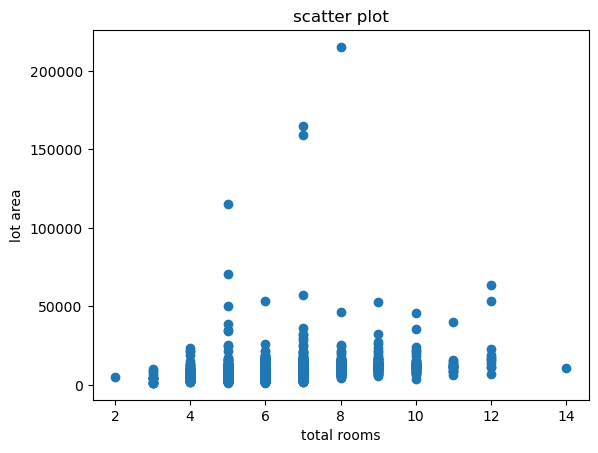

In [133]:
plt.scatter(mf.TotRmsAbvGrd , mf.LotArea)
plt.title('scatter plot')
plt.xlabel('total rooms')
plt.ylabel('lot area')
plt.show()

# Discover outliers with mathematical function 

z-score

Wikipedia definition of z score is z score is the signed number of standard deviation by which the value of observation and the data point is above the mean value of what is being discovered or measured 

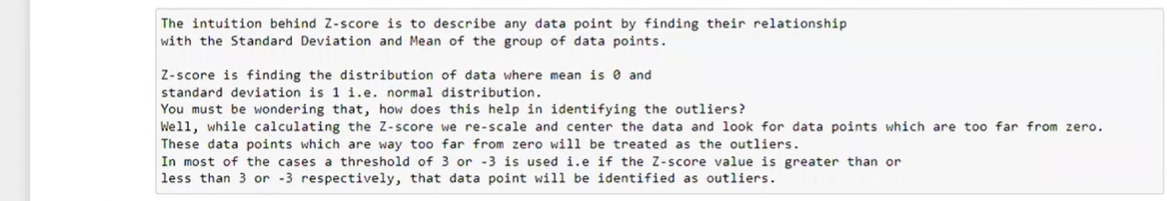

In [134]:
from scipy.stats import zscore 
import numpy as np

In [136]:
mf.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [137]:
# now we can find out the entire z-score value of file mf (house_median)
#if the z-score value lies out of range -3 and 3 we can find the outliers 

In [138]:
import numpy as np 

In [150]:
z= np.abs(zscore(mf))
z # HERE WE  will have some data is minus some is positive and to change the neg value into the positive we use abs function 

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,0.207142,0.651479,0.517200,0.459303,0.789741,1.227585,0.163779,0.912210,0.951226,0.351000,1.002743
1,0.091886,0.071836,2.179628,0.466465,0.789741,0.761621,0.163779,0.318683,0.600495,0.060731,1.002743
2,0.073480,0.651479,0.517200,0.313369,0.789741,1.227585,0.163779,0.318683,0.600495,0.631726,1.002743
3,0.096897,0.651479,0.517200,0.687324,1.026041,0.761621,0.163779,0.296763,0.600495,0.790804,0.997264
4,0.375148,1.374795,0.517200,0.199680,0.789741,1.227585,1.390023,1.527656,0.600495,1.698485,1.002743
...,...,...,...,...,...,...,...,...,...,...,...
1455,0.260560,0.071836,0.517200,0.238122,0.789741,1.227585,0.163779,0.296763,0.600495,0.060731,1.002743
1456,0.266407,0.071836,0.381743,1.104925,0.789741,0.761621,0.163779,0.296763,2.152216,0.126420,1.002743
1457,0.147810,0.651479,3.078570,0.215641,0.789741,0.761621,1.390023,1.527656,2.152216,1.033914,1.002743
1458,0.080160,0.795151,0.381743,0.046905,1.026041,0.761621,1.062465,0.934130,0.951226,1.090059,0.997264


In [141]:
# there are a lot of rows and data and now to check the data which holds value more than 3 we use threshold..

In [142]:
threshold = 3 
print(np.where(z>3))

(array([  53,   53,   88,  144,  166,  178,  185,  185,  188,  189,  191,
        218,  224,  241,  249,  250,  291,  298,  304,  309,  313,  330,
        332,  335,  375,  375,  378,  384,  398,  440,  451,  457,  461,
        496,  508,  519,  523,  533,  570,  581,  583,  597,  605,  624,
        628,  634,  635,  635,  642,  661,  664,  676,  691,  703,  706,
        726,  745,  769,  769,  803,  825,  843,  848,  897,  897,  910,
        921,  980,  991, 1031, 1044, 1061, 1123, 1149, 1154, 1163, 1163,
       1173, 1182, 1190, 1213, 1213, 1230, 1230, 1268, 1270, 1283, 1298,
       1298, 1298, 1298, 1298, 1327, 1350, 1350, 1350, 1352, 1373, 1386,
       1396, 1435, 1450, 1457], dtype=int64), array([0, 6, 2, 6, 8, 9, 2, 7, 5, 6, 2, 2, 3, 2, 0, 2, 6, 5, 2, 8, 0, 6,
       3, 0, 1, 2, 2, 0, 2, 3, 0, 0, 2, 3, 2, 2, 3, 1, 6, 9, 2, 5, 8, 5,
       5, 6, 6, 7, 8, 0, 9, 2, 3, 2, 0, 2, 2, 0, 7, 7, 9, 6, 0, 6, 7, 7,
       5, 2, 2, 7, 3, 9, 2, 2, 5, 5, 6, 7, 3, 9, 2, 6, 5, 7, 2, 6, 5, 0,
    

In [146]:
# array 1 is holding the row number and array 2 is holding the column number 
# all the columns are greater than 3 
# z[row][columnn

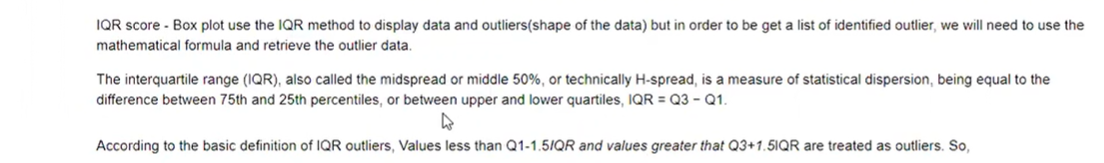

In [175]:
z[0][1]

KeyError: 0

In [155]:
Q1 = mf.quantile(0.25)

In [160]:
Q3=mf.quantile(0.75)

In [161]:
Q1

LotArea             7553.50
OverallQual            5.00
OverallCond            5.00
TotalBsmtSF          795.75
FullBath               1.00
HalfBath               0.00
BedroomAbvGr           2.00
TotRmsAbvGrd           5.00
Fireplaces             0.00
GarageArea           334.50
AboveMedianPrice       0.00
Name: 0.25, dtype: float64

In [163]:
Q3

LotArea             11601.50
OverallQual             7.00
OverallCond             6.00
TotalBsmtSF          1298.25
FullBath                2.00
HalfBath                1.00
BedroomAbvGr            3.00
TotRmsAbvGrd            7.00
Fireplaces              1.00
GarageArea            576.00
AboveMedianPrice        1.00
Name: 0.75, dtype: float64

In [168]:
hf_new = mf[(z<3).all(axis = 1)] #axis = 1 just check out all rows 

In [169]:
hf_new

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1454,7500,7,5,1221,2,0,2,6,0,400,1
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [170]:
mf.shape

(1460, 11)

In [171]:
# there is a difference of around 100+ rows that are outliers , and those rows are removes now in hf_new 

In [172]:
z

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,0.207142,0.651479,0.517200,0.459303,0.789741,1.227585,0.163779,0.912210,0.951226,0.351000,1.002743
1,0.091886,0.071836,2.179628,0.466465,0.789741,0.761621,0.163779,0.318683,0.600495,0.060731,1.002743
2,0.073480,0.651479,0.517200,0.313369,0.789741,1.227585,0.163779,0.318683,0.600495,0.631726,1.002743
3,0.096897,0.651479,0.517200,0.687324,1.026041,0.761621,0.163779,0.296763,0.600495,0.790804,0.997264
4,0.375148,1.374795,0.517200,0.199680,0.789741,1.227585,1.390023,1.527656,0.600495,1.698485,1.002743
...,...,...,...,...,...,...,...,...,...,...,...
1455,0.260560,0.071836,0.517200,0.238122,0.789741,1.227585,0.163779,0.296763,0.600495,0.060731,1.002743
1456,0.266407,0.071836,0.381743,1.104925,0.789741,0.761621,0.163779,0.296763,2.152216,0.126420,1.002743
1457,0.147810,0.651479,3.078570,0.215641,0.789741,0.761621,1.390023,1.527656,2.152216,1.033914,1.002743
1458,0.080160,0.795151,0.381743,0.046905,1.026041,0.761621,1.062465,0.934130,0.951226,1.090059,0.997264
